In [1]:
import csv
import torch
import pandas as pd
import numpy as np
from copy import deepcopy

In [2]:
df1 = pd.read_csv('russian_sales/sales_train.csv')[['date_block_num','shop_id','item_id','item_cnt_day']]
df2 = pd.read_csv('russian_sales/items.csv')[["item_id","item_category_id"]]
df1 = df1.merge(df2,on='item_id',how='left')[['date_block_num','shop_id','item_category_id','item_cnt_day']]

In [3]:
df = df1.groupby(['date_block_num','shop_id','item_category_id'],as_index = False).sum()

In [4]:
out_array = np.zeros((34,60,84)).astype(np.float)
for x in df.iterrows():
    out_array[int(x[1]['date_block_num'])][int(x[1]['shop_id'])][int(x[1]['item_category_id'])] = x[1]['item_cnt_day']

In [5]:
# print(np.median(out_array,axis=0))
# print(np.mean(out_array,axis=0))
pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(df.loc[df['item_category_id'] == 80])
print(df.loc[df['shop_id'] == 12])

       date_block_num  shop_id  item_category_id  item_cnt_day
374                 0       12                 2           5.0
375                 0       12                 5           5.0
376                 0       12                 6           2.0
377                 0       12                 9         149.0
378                 0       12                11           2.0
379                 0       12                14           1.0
380                 0       12                19          66.0
381                 0       12                21           6.0
382                 0       12                22           6.0
383                 0       12                23          21.0
384                 0       12                25           7.0
385                 0       12                28          49.0
386                 0       12                29           1.0
387                 0       12                30          65.0
388                 0       12                37       

In [14]:
out_array.shape

(34, 60, 84)

In [6]:
out_array_sub = out_array - np.median(out_array,axis=0)[None,:,:]
row_sums = np.sqrt(np.maximum(np.multiply(out_array_sub,out_array_sub),1e-20).sum(axis=0)[None,:,:]/out_array.shape[0])
norm_out_array = out_array_sub / row_sums
norm_out_array.shape
np.save('dataset/russian_norm_meadian_numpy_complete',norm_out_array)
np.save('dataset/russian_norm_meadian_numpy_train',norm_out_array[:29])
np.save('dataset/russian_norm_meadian_numpy_test_7months',norm_out_array[27:])
np.save('dataset/russian_norm_meadian_numpy_test_5months',norm_out_array[29:])
np.save('dataset/russian_norm_meadian_numpy_test_3months',norm_out_array[29:32])
np.save('dataset/russian_norm_meadian_numpy_test_1months',norm_out_array[31:32])
np.save('dataset/russian_norm_meadian_numpy_test_last_2months',norm_out_array[32:])

In [8]:
f = open('dataset/russian_norm_median_csv_complete.csv','w')
f.write('time,shop,prod,Measure\n')
for i in range(norm_out_array.shape[0]):
    for j in range(norm_out_array.shape[1]):    
        for k in range(norm_out_array.shape[2]):
            f.write('%d,%d,%d,%f\n'%(i,j,k,norm_out_array[i][j][k]))

In [7]:
for x in range(norm_out_array.shape[1]):
    for y in range(norm_out_array.shape[2]):
        print (np.linalg.norm(norm_out_array[:,x,y]))
#         if (np.linalg.norm(norm_out_array[:,x,y]) == 0):
#             print (x,y)
# df.loc[df['shop_id'] == 0].loc[df['item_category_id'] == 7]

5.8309518948453
5.8309518948453
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845302
0.0
0.0
0.0
0.0
5.830951894845301
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
0.0
0.0
5.830951894845301
0.0
5.830951894845301
5.8309518948453
5.830951894845299
0.0
5.830951894845301
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
0.0
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
5.8309518948453
0.0
5.830951894845301
5.830951894845301
0.0
5.8309518948453
0.0
5.830951894845301
0.0
0.0
0.0
5.830951894845301
0.0
0.0
0.0
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.830951894845301
5.8309518948453
0.0
5.830951894845301
5.8309518948453
5.830951894845301
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
5.830951894845301
5.8309518948453
5.830951894845301
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
0.0
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
0.0


0.0
0.0
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845302
5.830951894845301
0.0
5.830951894845301
5.8309518948453
5.8309518948453
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
0.0
5.8309518948453
5.8309518948453
0.0
0.0
0.0
0.0
5.8309518948453
5.830951894845302
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845302
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.8309518948453
5.830951894845301
0.0
5.830951894845301
5.8309518948453
5.8309518948453
5.8309518948453
5.830951894845301
0.0
5.8309518948453025
0.0
5.8309518948453
0.0
0.0
0.0
5.830951894845301
5.8309518948453
5.830951894845301
0.0
0.0
5.8309518948453
5.8309518948453
0.0
5.8309518948453
5.8309518948453
5.8309518948453
0.0
0.0
0.0
0.0
5.830951894845301
0.0
0.0
0.0
0.0
0.0
0.0
5.830951894845301
5.830951894845301
5.8309518948453
5.8309518948453
5.830951894845301
5.830951894845301
0.0
0.0
0.0
5.8309518948453
5.8309518948453
5.8309518948453
0.0
0

5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.830951894845301
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
5.830951894845301
0.0
5.830951894845301
5.830951894845301
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.830951894845301
0.0
0.0
0.0
0.0
0.0
5.830951894845301
5.830951894845301
0.0
5.8309518948453
0.0
0.0
5.830951894845301
5.8309518948453
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.8309518948453
0.0
0.0
0.0
5.830951894845301
0.0
0.0
0.0
5.830951894845301
0.0
0.0
0.0
5.830951894845301
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
0.0
5.8309518948453
5.8309518948453
0.0
5.830951894845301
5.830951894845301
5.830951894845299
5.830951894845301
0.0
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.8309518948453
5.83095189

5.8309518948453
5.8309518948453
5.8309518948453
0.0
5.8309518948453
5.8309518948453
5.8309518948453
5.8309518948453
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.8309518948453
5.8309518948453
0.0
0.0
5.8309518948453
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.8309518948453
5.8309518948453
5.830951894845301
5.830951894845299
5.830951894845299
5.830951894845301
5.830951894845302
0.0
0.0
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.830951894845301
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
0.0
5.830951894845301
0.0
0.0
0.0
0.0
0.0


In [10]:
out_file_train = 'dataset/russian_norm_meadian_numpy_train.txt'
out_file_val = 'dataset/russian_norm_meadian_numpy_val.txt'
with open (out_file_train,'w') as f:
    f.write('time,shop,item,cnt\n')
    for x in range(29):
        for y in range(norm_out_array.shape[1]):
            for z in range(norm_out_array.shape[2]):
                f.write('%d,%d,%d,%f\n'%(x,y,z,norm_out_array[x,y,z]))
with open (out_file_val,'w') as f:
    f.write('time,shop,item,cnt\n')
    for x in range(29,34):
        for y in range(norm_out_array.shape[1]):
            for z in range(norm_out_array.shape[2]):
                f.write('%d,%d,%d,%f\n'%(x,y,z,norm_out_array[x,y,z]))
    

In [9]:
########### Inference/Analysis Code #######################

In [8]:
import csv
import torch
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [4]:
######### Generate outlier validation set ##################
test_set = np.load('dataset/russian_norm_meadian_numpy_test_7months.npy')
#print (test_set.shape)
num_points = 100
outliers_ = np.concatenate((np.random.randint(2,5,(num_points,1)),np.random.randint(0,60,(num_points,1)),np.random.randint(0,84,(num_points,1))),1)
for x in outliers_ :
    test_set[x[0],x[1],x[2]] += 3
np.save('dataset/russian_norm_meadian_numpy_test_modified_our.npy',test_set)
np.save('dataset/russian_norm_meadian_numpy_test_modified_rvae.npy',test_set[2:5])
outliers_ = np.unique(outliers_,axis=0)
print (outliers_.shape)
outliers_ = outliers_.tolist()
# plt.scatter(test_set[1],np.zeros(test_set[1].shape))
# np.where(test_set[1]>5.5)

(100, 3)


In [5]:
from helper import NN, Dataset_
device = torch.device('cuda:0')
loss = torch.nn.L1Loss()
batch_size = 128
test_set = Dataset_('dataset/russian_norm_meadian_numpy_test_modified_our.npy')
test_loader = torch.utils.data.DataLoader(test_set,batch_size = batch_size,drop_last = True)
model = NN().to(device)
model.load_state_dict(torch.load('/mnt/blossom/more/pbansal/run1_checkpoints/checkpoint_35'))
pred_ = []
points_our = []
#outliers = []
loss_ = 0
for x,y,index in test_loader :
    with torch.no_grad():
        x = x.to(device)
        y_pred = model(x)
        #print (y)
        y = y.to(device)
        loss_ += loss(y,y_pred).data
        for i in range(batch_size):
            y_ = y[i].data.cpu().numpy() 
            pre_ = y_pred[i].data.cpu().numpy()
            pred_.append([y_,pre_])
            if ([index[0][i],index[1][i],index[2][i]] in outliers_):
                points_our.append([y_,y_-3,pre_])
#             if (abs(y_-pre_)>3):
#                 outliers.append(((index[0][i],index[1][i],index[2][i]),(y_,pre_)))
# loss_ = (loss_/int(len(test_set)/batch_size)).cpu().data.numpy()
# print (loss_)
pred_ = np.array(pred_)
# print (pred_.shape)
points_our = np.array(points_our)
points_our.shape

loading dataset


(99, 3)

In [16]:
#2.107911 0.7350846
#1.1079112 0.5312016
#0.10791123 0.27108502
print(len(outliers_)/len(test_set))
for x in outliers_:
    print (x)

In [114]:
# def foo(time,shop,prod):
#     return 3*(60*prod+shop)+(time-2)
# x = test_set[foo(4,53,80)]
# print (x[0][0,:4])
# print (x[0][0,4:12])
# print (x[0][0,12:])
# print (x[1:])

In [113]:
#df.loc[df['shop_id'] == 38].loc[df['item_category_id'] == 71]#.loc[df['date_block_num'] == 31]
#df.loc[df['item_category_id'] == 24].loc[df['shop_id'] == 44]#.loc[df['date_block_num'] == 23]#.loc[df['shop_id'] == 44]#.loc[df['date_block_num'] == 32]#
#print(df)
#arr = np.load('dataset/russian_norm_meadian_numpy_train.npy')
#arr = np.load('dataset/russian_norm_meadian_numpy_test_3months.npy')
#print(arr[:,44,])
#print (test_set[3956])

In [27]:
from RVAE_minimal.RVAE import VAE
from RVAE_minimal.helper import Dataset_

import os

batch_size = 64
pred_rvae = []
points_rvae = []
def test_ ():
    val_set = Dataset_('/mnt/a99/d0/pbansal/dataset/russian_norm_meadian_numpy_test_modified_our.npy')
    val_loader = torch.utils.data.DataLoader(val_set,shuffle=True,batch_size = batch_size,drop_last=True)
    model = VAE().cuda()
    maeloss = torch.nn.L1Loss()
    epoch = 31
    model.load_state_dict(torch.load(os.path.join('/mnt/blossom/more/pbansal/rvae_checkpoints/','checkpoint_%d'%epoch)))
    loss_ = 0
    for x,index in val_loader :
        with torch.no_grad():
            p_params,q_params,q_samples = model(x.cuda())
            loss_ += maeloss(x[:,-1].cuda(),p_params['x'][:,-1]).data
            for i in range(batch_size):
                pred_rvae.append([x[i,-1].data.cpu().numpy(),p_params['x'][i,-1].data.cpu().numpy()])
                if ([index[0][i],index[1][i],index[2][i]] in outliers_):
                    points_rvae.append([x[i,-1].data.cpu().numpy(),x[i,-1].data.cpu().numpy()-3,p_params['x'][i,-1].data.cpu().numpy()])
    loss_ = loss_/int(len(val_set)/batch_size)
test_()
pred_rvae = np.array(pred_rvae)
points_rvae = np.array(points_rvae)

loading dataset


In [20]:
print(outliers_)

[[2, 3, 31], [2, 6, 82], [2, 7, 83], [2, 9, 42], [2, 11, 3], [2, 14, 39], [2, 17, 60], [2, 17, 63], [2, 18, 0], [2, 20, 43], [2, 20, 68], [2, 21, 77], [2, 26, 65], [2, 28, 6], [2, 29, 9], [2, 29, 24], [2, 31, 11], [2, 31, 39], [2, 31, 43], [2, 31, 58], [2, 31, 65], [2, 36, 57], [2, 39, 33], [2, 42, 2], [2, 42, 26], [2, 43, 46], [2, 46, 17], [2, 47, 63], [2, 48, 35], [2, 48, 76], [2, 48, 80], [2, 50, 47], [2, 55, 48], [3, 3, 30], [3, 3, 68], [3, 12, 47], [3, 13, 25], [3, 13, 71], [3, 17, 62], [3, 18, 19], [3, 18, 40], [3, 18, 57], [3, 25, 2], [3, 25, 47], [3, 26, 31], [3, 29, 41], [3, 29, 66], [3, 31, 4], [3, 31, 53], [3, 34, 70], [3, 35, 76], [3, 37, 17], [3, 37, 40], [3, 38, 75], [3, 39, 49], [3, 39, 81], [3, 40, 2], [3, 42, 24], [3, 43, 77], [3, 46, 83], [3, 48, 58], [3, 50, 82], [3, 53, 26], [3, 53, 42], [3, 53, 66], [3, 56, 44], [3, 57, 41], [4, 0, 71], [4, 1, 51], [4, 3, 53], [4, 6, 68], [4, 7, 18], [4, 16, 79], [4, 18, 57], [4, 18, 72], [4, 19, 20], [4, 20, 58], [4, 21, 39], [4, 

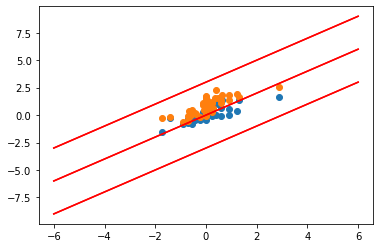

In [32]:
def plot(pred_):
    plt.scatter(pred_[:,0],pred_[:,1])
    plt.plot([-6,6],[-6,6],c='r')
    plt.plot([-6,6],[-3,9],c='r')
    plt.plot([-6,6],[-9,3],c='r')
plot(points_our[:,1:])
plot(points_rvae[:,1:])
# plot(pred_rvae[:,:])
# plot(pred_[:,:])

In [22]:
# print (points_our.shape)
# print (points_rvae.shape)
#print (points_our)
test_set = np.load('dataset/russian_norm_meadian_numpy_test_7months.npy')
print (test_set.shape)
print (3*60*84*0.02)

(7, 60, 84)
302.40000000000003
